In [1]:
# IPython Imports
# Used to make notebook wider, comment out for normal notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from IPython.display import clear_output

In [2]:
%matplotlib inline
# Import Libraries
import boto3
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from typing import List, Dict, Callable

plt.style.use('dark_background')
# plt.style.use('ggplot')


In [3]:
# GLOBAL VARS
BKT_NAME = 'ds-data-2020'
# DATASET NAMES
the_cc = "auto_data_clean.csv" # Main CLEANED Dataset
# SET DATA PATH/KEYS
KEY = the_cc

In [4]:
# Create boto3 s3 Client Object
s3 = boto3.client('s3')
# Create s3 Bucket Object -> Dict
obj = s3.get_object(Bucket=BKT_NAME, Key=KEY)

In [5]:
# Convert Bucket File to pd.DataFrame
auto_df = pd.read_csv(obj['Body'], low_memory=False)

In [94]:
# PLOTTER FUNCTIONS
def build_scatter(ax_obj:object, x_series:pd.Series, y_series:pd.Series, x_range:tuple, ax_pos=None, fig_obj:object=None, colors:list=None, alpha_col:float=0.7, col_div:bool=False, col_bar:bool=False) -> None:
    """Create scatter plot with color divides by bounds"""
    # Set Default Colors
    colors = colors if colors is not None else ["g", "deeppink", "dodgerblue", "orange", "purple", "red", "white"]
    # Create Bounds From x_series
    bounds = np.arange(*x_range)
    # Create Color Divides by Bound Range
    cmap = matplotlib.colors.ListedColormap(colors) if col_div else None
    norm = matplotlib.colors.BoundaryNorm(bounds, len(colors)) if col_div else None

    # Assign Scatter to ax_obj
    ax_var = ax_obj.scatter(x_series, y_series, c=x_series, cmap=cmap, norm=norm, alpha=alpha_col)

    # Decoration
    ax_obj.set_title(f'\n{y_series.name} by {x_series.name}\n', fontsize=22)
    ax_obj.set_xlabel(f"{x_series.name}\n", fontsize=18)
    ax_obj.set_ylabel(f"{y_series.name}\n", fontsize=18)
    
    # Add Color Bar
    if col_bar and (fig_obj is not None and ax_pos is not None):
        fig_obj.colorbar(ax_var, ax=ax_pos, cax=ax_obj, pad=0.2)
    
    # Set Lims
    ax_obj.set_xlim(x_series.min(), x_series.max())

    
#     f.colorbar(l0, ax=list(ax[1,0:2]),orientation='horizontal', pad=0.2)
#     f.colorbar(l2, ax=ax[1,2],orientation='horizontal', aspect=10, pad=0.2)
    
    
#     im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

#     fig.subplots_adjust(right=0.8)
#     cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#     fig.colorbar(im, cax=cbar_ax)

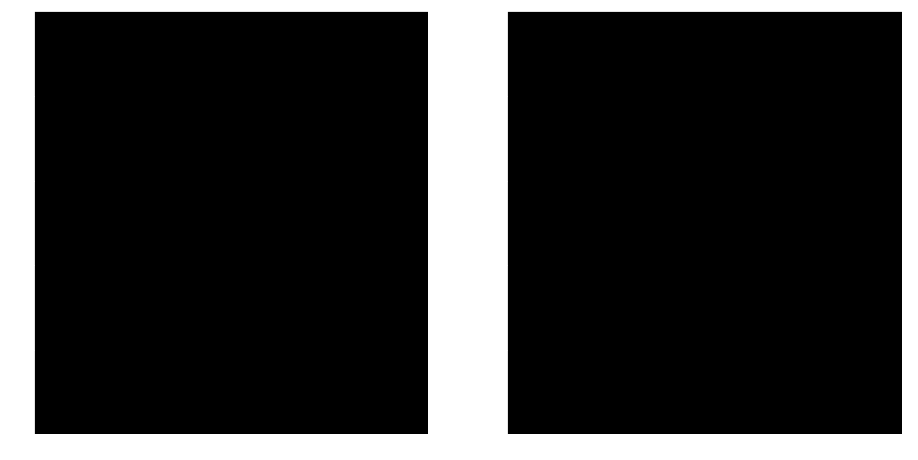

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(14,7), facecolor='white', dpi= 80)

# build_scatter(ax[0], auto_df["Torque"], auto_df["Gas Mileage (Combined)"], (0, 850, 100), ax_pos=0, fig_obj=fig, col_bar=True, col_div=True)



# Cylinder to MPG Density Plot

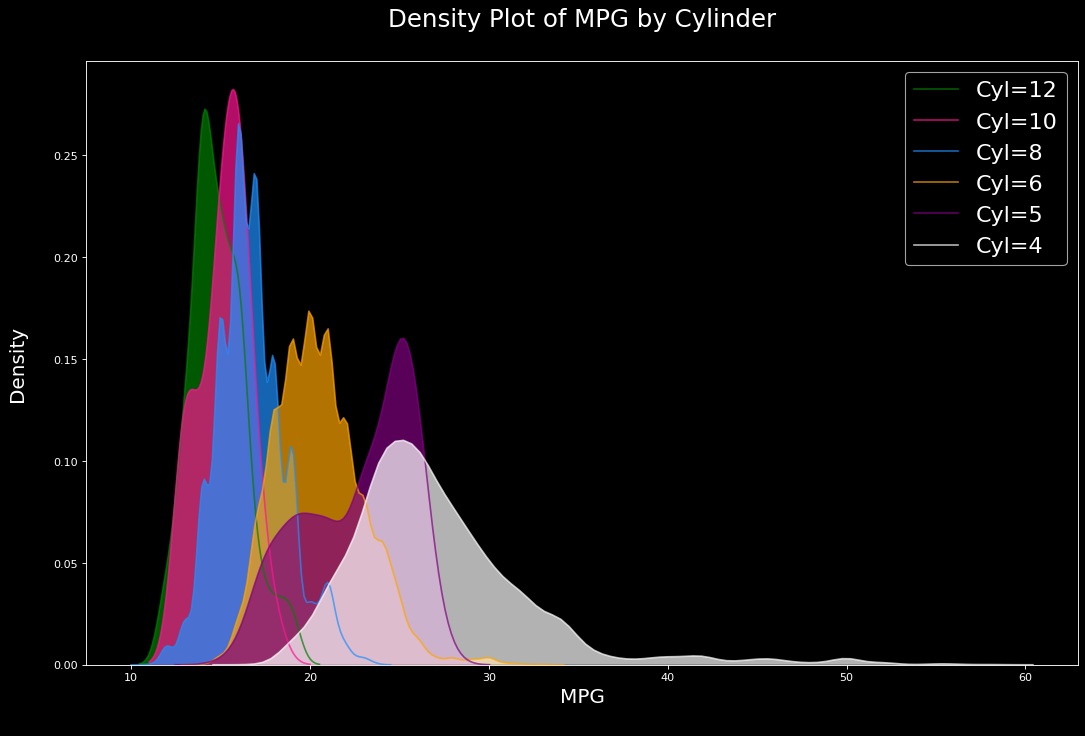

In [15]:
# plt.style.use('dark_background')
# plt.style.use('ggplot')


# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)

alpha_col = 0.7
colors = ["g", "deeppink", "dodgerblue", "orange", "purple", "white", "red"]
cyls = (sorted(auto_df["Cylinders"].unique())[1:-1][::-1])

# Plot Points
for col, cyl in zip(colors, cyls):
    cyl = int(cyl)
    sns.kdeplot(auto_df.loc[auto_df['Cylinders'] == cyl, "Gas Mileage (Combined)"], shade=True, color=col, label=f"Cyl={cyl}", alpha=.7)

# Decoration
plt.title('Density Plot of MPG by Cylinder\n', fontsize=22)
plt.xlabel("MPG\n", fontsize=18)
plt.ylabel("Density\n", fontsize=18)
plt.legend(fontsize=20)

# Show Plot
fig.tight_layout()
plt.show()

In [25]:
brand_5_cyl = auto_df[auto_df["Cylinders"] == 5].groupby("Brand")

In [27]:
# for x in brand_5_cyl:
#     print(x)

In [53]:
five_cyl_df = auto_df.loc[:, "Year":"Fuel System"][auto_df["Cylinders"] == 5]

In [92]:
five_cyl_df

,Year,Brand,Model,Style Name,Drivetrain,Horsepower,Torque,Engine Type,Cylinders,Displacement(L),Base Curb Weight (lbs),Gas Mileage (Combined),MSRP($),Transmission,Body Style,Fuel System
1305,2018,Audi,RS 3,2.5 TFSI S Tronic,All Wheel Drive,400.0,354.0,Intercooled Turbo Premium Unleaded I-5,5.0,2.5,3593.0,22.0,54900.0,NaN,4dr Car,Port/Direct Injection
1364,2018,Audi,TT,2.5 TFSI,All Wheel Drive,400.0,354.0,Intercooled Turbo Premium Unleaded I-5,5.0,2.5,3306.0,22.0,64900.0,Transmission: 7-Speed S tronic Automatic,2dr Car,Port/Direct Injection
1371,2013,Audi,TT,2dr Cpe MT quattro 2.5T,All Wheel Drive,360.0,343.0,Turbocharged Gas I5,5.0,NaN,3306.0,20.0,57200.0,6-speed manual transmission -inc: self-adjusti...,2dr Car,Direct Injection
1376,2012,Audi,TT,2dr Cpe MT quattro 2.5T,All Wheel Drive,360.0,343.0,Turbocharged Gas I5,5.0,NaN,3306.0,20.0,56850.0,6-speed manual transmission,2dr Car,Direct Injection
4743,2012,Chevrolet,Colorado,Regular Cab Chassis Cab 4-Wheel Drive 1WT,4-Wheel Drive,242.0,242.0,Gas 5-Cyl,5.0,3.7,NaN,18.0,23125.0,"Transmission, 4-speed automatic, electronicall...",Regular Cab Chassis-Cab,SFI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2003,Volvo,XC90,4dr 2.5L Turbo AWD,All Wheel Drive,208.0,236.0,Turbo Gas I5,5.0,2.5,4493.0,21.0,35100.0,5-speed driver-adaptive Geartronic automatic t...,Sport Utility,MPI
26280,2016,Volvo,V60 Cross Country,4dr Wgn T5 AWD,All Wheel Drive,250.0,266.0,Intercooled Turbo Regular Unleaded I-5,5.0,2.5,3602.0,23.0,41200.0,Transmission: 6-Speed Geartronic Automatic -in...,4dr Car,MPI
26281,2016,Volvo,V60 Cross Country,4dr Wgn T5 Platinum AWD,All Wheel Drive,250.0,266.0,Intercooled Turbo Regular Unleaded I-5,5.0,2.5,3602.0,23.0,44850.0,Transmission: 6-Speed Geartronic Automatic -in...,4dr Car,MPI
26282,2015,Volvo,V60 Cross Country,2015.5 4dr Wgn T5 AWD,All Wheel Drive,250.0,266.0,Intercooled Turbo Regular Unleaded I-5,5.0,2.5,3602.0,23.0,41000.0,Transmission: 6-Speed Geartronic Automatic -in...,4dr Car,MPI


In [93]:
five_cyl_df.describe()

,Year,Horsepower,Torque,Cylinders,Displacement(L),Base Curb Weight (lbs),Gas Mileage (Combined),MSRP($)
count,528.000000,528.000000,528.000000,528.0,526.000000,362.000000,528.000000,528.000000
mean,2009.532197,207.513258,214.954545,5.0,2.822624,3346.486188,22.696970,26203.589015
std,3.681703,42.256870,38.844968,0.0,0.531128,378.428103,2.969809,7233.870348
min,2001.000000,150.000000,166.000000,5.0,2.300000,2884.000000,15.000000,15085.000000
25%,2007.000000,170.000000,177.000000,5.0,2.500000,3102.000000,20.000000,20577.500000
50%,2010.000000,208.000000,225.000000,5.0,2.500000,3230.000000,23.000000,24440.000000
75%,2013.000000,242.000000,242.000000,5.0,3.500000,3528.000000,25.000000,30885.000000
max,2018.000000,400.000000,354.000000,5.0,3.700000,4647.000000,27.500000,64900.000000
